# Clustering
Denne innleveringen omhandler "clustering" eller "klynging", som er en form for
"unsupervised learning". Dette temaet er presentert i videoer relatert til denne
modulen, og beskrives ikke i detalj her i selve oppgave-notebook'en. 

Oppgavene du skal løse fungerer som små byggeblokker eller steg på veien som til slutt
kombineres til en fungerende clustering-algoritme (K-means). Vær litt obs på dette - du
skal "gjenbruke" funksjonene fra de første oppgavene i de senere oppgavene.  

Vi importerer først modulene vi trenger:

In [123]:
# Imports
import numpy as np  # For vectors and matrices
import random
from numpy.typing import NDArray
import ipytest
import csv
import matplotlib.pyplot as plt
import pytest
import sklearn.datasets
import sklearn.metrics

In [124]:
# Set up pytest for Jupyter notebooks
ipytest.autoconfig()

## Oppgave 1: Distanse-funksjon
Implementer en funksjon som beregner den Euklidske distansen mellom 2 vektorer.
Vektorene kan et villkårlig antall elementer/"dimensjoner" (2,3, eller flere). 

In [125]:
def distance(a: NDArray, b: NDArray) -> float:
    """Calculate Euclidian distance between two vectors

    Parameters
    ----------
    a: NDArray
        First vector (NumPy array)
    b: NDArray
        Second vector (NumPy array), same length as a

    Returns
    -------
    d : float
        Euclidian distance between a and b

    """
    return np.sqrt(np.sum((a - b) ** 2))

In [126]:
%%ipytest


def test_distance():
    """Test calculation of distance for vectors of different lengths"""
    assert distance(np.array([7]), np.array([4])) == 3.0  # 1D
    assert distance(np.array([6, 4]), np.array([2, 1])) == 5.0  # 2D
    assert distance(np.array([-4, 7, 5.5]), np.array([2, 3.14, 9])) == pytest.approx(
        7.9466722
    )  # 3D
    assert distance(
        np.array([99.7, -29, -77.3, 35]), np.array([50.1, 70.2, 75.9, -33.33])
    ) == pytest.approx(201.097063)  # 4D


.                                                                                            [100%]
1 passed in 0.01s


## Oppgave 2: Finne nærmeste punkt
Implementer en funksjon som finner tar utgangspunkt i et datapunkt $x$, sammenligner det
med flere datapunkter samlet i ei matrise $C$, og som så returnerer indeks til punktet i $C$ som
ligger nærmest $x$.

In [127]:
def closest_point_index(x: NDArray, C: NDArray) -> int:
    """Find index of closest point in vector space

    Parameters
    ----------
    x: NDArray
        NumPy vector, shape (N,)
    C: NDArray
        NumPy matrix, shape (k,N), corresponding to k row vectors
        with the same length as x

    Returns
    -------
    i: int
        Index of row vector in C which is closest to x
        Index is in range [0,1,...,k-1].
    """
    distances = []
    # Iterate over each vector in C and compute distance to x
    for vec in range(C.shape[0]):
        d = distance(x, C[vec])
        distances.append(d)

    # Find the index of the minimum distance
    min_index = np.argmin(distances)

    return int(min_index)

In [128]:
%%ipytest


def test_closest_point_index():
    """Test calculation of which point in C is closest to point x"""
    # k=2, N=2
    x = np.array([2, 2])
    C = np.array([[0, 0], [3, 3]])
    assert closest_point_index(x, C) == 1

    # k=3, N=3
    x = np.array([2, 5, 4])
    C = np.array([[3, 4, 5], [0, 1, 0], [2, 5, -4]])
    assert closest_point_index(x, C) == 0

    # k=5, N=4
    x = np.array([4.5, 8.8, 3.0, 6.4])
    C = np.array(
        [
            [8.0, 9.52, 3.16, 5.4],
            [2.9, 8.52, 2.19, 5.97],
            [5.43, 9.4, 3.18, 5.29],
            [2.4, 14.34, 1.84, 9.97],
            [2.95, 8.79, 1.89, 8.22],
        ]
    )
    assert closest_point_index(x, C) == 2

.                                                                                            [100%]
1 passed in 0.01s


## Oppgave 3: Velge tilfeldige punkter
K-means-algoritmen trenger noen tilfeldige datapunkter fra datasettet før den kan
begynne å iterere seg mot en ferdig klynging. Implementer en funksjon som velger $k$
tilfeldige datapunkter fra ei datamatrise $X$ (uten tilbakelegging).

In [129]:
def choose_random_points(X: NDArray, k: int) -> NDArray:
    """Randomly choose k row vectors from matrix

    Parameters
    ----------
    X: NDArray
        NumPy matrix of shape (M,N) (M row vectors of length N)
    k: int
        Number of vectors to choose at random (integer)

    Returns
    -------
    C: NDArray
        Subset of X, containing k randomly chosen row vectors.
        Shape (k,N).

    Raises
    ------
    ValueError
        Vectors are chosen without replacement. Using a k larger than the
        number of vectors in X raises a ValueError.
    """
    M = X.shape[0]
    
    if k > M:
        raise ValueError("k cannot be larger than the number of vectors in X")

    # Randomly choose k unique indices from 0 to M-1
    chosen_indices = random.sample(range(M), k)

    # Select the corresponding row vectors from X
    C = X[chosen_indices, :]

    return C

In [130]:
%%ipytest


def test_choose_random_points_1():
    """Check that k unique rows have been randomly selected"""
    k = 9
    X = np.random.standard_normal(size=(10, 2))
    C = choose_random_points(X, k=k)
    assert all(
        [row in X.tolist() for row in C.tolist()]
    )  # Check that every row in C is in X
    assert len(np.unique(C, axis=0)) == 9  # Check that every row is unique


def test_choose_random_points_2():
    """Check that returned subset is not always the same"""
    k = 3
    X = np.random.standard_normal(size=(20, 2))
    C1 = choose_random_points(X, k=k)
    C2 = choose_random_points(X, k=k)
    assert ~np.all(C1 == C2)


def test_choose_random_points_3():
    """Check that a ValueError is raised if k is too large"""
    k = 9
    X = np.random.standard_normal(size=(8, 2))
    with pytest.raises(ValueError):
        C = choose_random_points(X, k=k)


...                                                                                          [100%]


3 passed in 0.02s


## Oppgave 4: Finn nærmeste tyngdepunkt for alle datapunkter
Implementer en funksjon som går gjennom alle datapunktene i ei datamatrise $X$,
sammenligner hvert datapunkt med et sett med tyngdepunkter $C$, og finner indeks til
tyngdepunktet som ligger nærmest datapunktet. 

In [131]:
def find_closest_centroid(X: NDArray, C: NDArray) -> NDArray:
    """Find index to closest centroid for every datapoint

    Parameters
    ----------
    X: NDArray
        NumPy matrix of shape (M,N) (M row vectors of length N)
    C: NDArray
        NumPy matrix of shape (k,N), representing centroids
        for k clusters.

    Returns
    -------
    y: NDArray
        NumPy vector, shape (M,), with values in range [0,1,...,k-1].
        y represents a "cluster index" for each data point in X.
        If X[i,:] is closest to centroid C[j,:], then y[i] = j.
        y has an integer data type.
    """
    M = X.shape[0]
    
    # Initialize y with zeros
    y = np.zeros(M, dtype=int)

    for i in range(M):
        y[i] = closest_point_index(X[i], C)

    return y

In [132]:
%%ipytest


def test_find_closest_centroid_1():
    """Find closest centroids using small dataset with 2 centroids"""
    C = np.array([[1, 2], [1, -1]])
    X = np.array([[0, 0], [2, 2], [3, 1], [-1, -2]])
    assert np.all(find_closest_centroid(X, C) == np.array([1, 0, 0, 1]))


def test_find_closest_centroid_2():
    """Find closest centroids using larger dataset with 3 centroids"""
    X = np.array(
        [
            [-1.56, 1.54, 1.49],
            [-0.19, 0.53, 1.82],
            [0.14, 1.97, 0.76],
            [1.16, -0.62, -0.09],
            [-0.47, 2.07, 1.25],
            [-0.44, 2.25, 1.33],
            [-0.72, 0.39, 1.16],
            [1.13, -0.59, 0.16],
        ]
    )
    C = np.array([[0, 2, 1], [-1, 1, 2], [1, -1, 0]])
    assert np.all(find_closest_centroid(X, C) == np.array([[1, 1, 0, 2, 0, 0, 1, 2]]))

..                                                                                           [100%]


2 passed in 0.02s


## Oppgave 5: Beregne nye tyngdepunkt
Implementer en funksjon som tar utgangspunkt i ei datamatrise $X$ og et sett med heltall
$y$ (indekser) som indikerer hvilket tyngdepunkt hvert datapunkt er nærmest til. Beregn
nye tyngdepunkter basert på gjennomsnittsverdiene for alle datapunkter som har samme y-verdi.

In [133]:
def calculate_new_centroids(X: NDArray, y: NDArray) -> NDArray:
    """Calculate centroid for each of k clusters

    Parameters
    ----------
    X: NDArray
        NumPy matrix, shape (M,N) (M row vectors of length N)
    y: NDArray
        Cluster index, shape (M,), with values in range [0,1,...,k-1],
        where k is the number of clusters. Integer data type.

    Returns
    -------
    C: NDArray
        NumPy matrix, shape (k,N), containg the centroids of each cluster.
        C[i,:] corresponds to the columnwise mean of all datapoints in X
        for which y==i.
    """
    # Determine number of clusters k from y because y contains indices from 0 to k-1
    k = np.max(y) + 1
    # Number of features
    N = X.shape[1]
    # Initialize centroids matrix
    C = np.zeros((k, N))

    for i in range(k):
        points_in_cluster = X[y == i]
        if points_in_cluster.shape[0] > 0:
            # Calculate mean of points in cluster i
            C[i] = np.mean(points_in_cluster, axis=0)
        else:
            # If no points assigned to cluster, set centroid to zero vector
            C[i] = np.zeros(N)

    return C

In [134]:
%%ipytest


def test_calculate_new_centroids_1():
    """Calculate new centroids C based on cluster labels y - simple data"""
    X = np.array([[-1, 1], [-2, 1], [-1, 2], [1, 1], [2, 1], [1, 0]])
    y = np.array([0, 0, 0, 1, 1, 1])
    C_expected = np.array([[-1.33333, 1.33333], [1.33333, 0.66667]])
    C = calculate_new_centroids(X, y)
    assert np.all(np.isclose(C, C_expected))


def test_calculate_new_centroids_2():
    """Calculate new centroids C based on cluster labels y - more complex data"""
    X = np.array(
        [
            [0.9019, 2.1586, 1.0051],
            [0.9800, -0.8962, -0.1446],
            [0.1207, 2.5913, 1.0828],
            [-0.8316, 1.4617, 1.5962],
            [0.7877, -1.4053, 0.4038],
            [-1.5502, 0.3085, 3.0831],
            [-0.8237, 0.5338, 2.3064],
            [-0.3278, 2.0823, 0.7317],
        ]
    )
    y = np.array([0, 2, 0, 0, 2, 1, 1, 0])
    C_expected = np.array(
        [
            [-0.0342, 2.073475, 1.10395],
            [-1.18695, 0.42115, 2.69475],
            [0.88385, -1.15075, 0.1296],
        ]
    )
    C = calculate_new_centroids(X, y)
    assert np.all(np.isclose(C, C_expected))

..                                                                                           [100%]
2 passed in 0.02s


## Oppgave 6: En enkelt K-means-iterasjon
K-means er en iterativ algoritme som starter med et (tilfeldig) estimat av tyngdepunkter
i klyngene. Implementer en funksjon som gjennomfører en enkelt iterasjon av algoritmen.

In [135]:
def kmeans_iteration(X: NDArray, C: NDArray) -> tuple[NDArray, NDArray]:
    """Perform a single iteration of the k-means algorithm

    Parameters
    ----------
    X: NDArray
        NumPy matrix, shape (M,N) (M row vectors of length N)
        Contains input data points to be clustered
    C: NDArray
        NumPy matrix, shape (k,N) (k row vectors of length N)
        Contains k cluster centroid vectors.

    Returns
    -------
    y: NDArray
        Class label vector, shape Mx1 (one element for each row of X).
        Corresponds to the indices of rows in C for which each
        vector in X is closest.
        If X[i,:] is closest to centroid C[j,:], then y[i] = j.
    C_next: NDArray
        Modified version of C based on calculated class labels y.
        C[i,:] corresponds to the columnwise mean of all datapoints
        in X for which y==i.
    """
    y = find_closest_centroid(X, C)
    C_next = calculate_new_centroids(X, y)
    return y, C_next

In [136]:
%%ipytest


def test_kmeans_iteration():
    """Test K-means iteration with simple case of 2 clusters with 4 points in each"""
    X = np.array(
        [
            [1, 1],  # Two "square" clusters offset from one another
            [2, 1],
            [4, 3],
            [5, 3],
            [4, 4],
            [1, 2],
            [2, 2],
            [5, 4],
        ]
    )
    C = np.array([[1, 0], [5, 5]])  # Initial centroids outside clusters in X
    y_expected = np.array([0, 0, 1, 1, 1, 0, 0, 1])
    C_next_expected = np.array([[1.5, 1.5], [4.5, 3.5]])
    y, C_next = kmeans_iteration(X, C)
    assert np.all(np.isclose(C_next, C_next_expected))
    assert np.all(np.isclose(y, y_expected))

.                                                                                            [100%]
1 passed in 0.02s


## Oppgave 7: K-means
Bruk byggeblokkene du har laget så langt og implementer hele K-means-algoritmen. 

In [137]:
def kmeans(X: NDArray, k: int, maxiter: int = 100) -> tuple[NDArray, NDArray]:
    """Cluster data points into fixed number of clusters using K-means

    Parameters
    ----------
    X: NDArray
        NumPy Matrix, shape (M,N) (M row vectors of length N)
    k: int
        Number of clusters. Must be <= M
    maxiter: int
        Maximum number of iterations

    Returns
    -------
    y: NDArray
        NumPy array, shape (M,), with indices in range [0,1,...,k-1],
        indicating the cluster number of each data point in X
    C: NDArray
        NumPy matrix, shape (k,N) (k row vectors of length N)
        Contains k cluster centroid vectors.

    # Notes:
    - If k>M, a ValueError is raised.
    """
    M = X.shape[0]

    if k > M:
        raise ValueError("k cannot be larger than the number of data points M")

    # Step 1: Initialize centroids by randomly choosing k points from X
    C = choose_random_points(X, k)

    for _ in range(maxiter):
        # Step 2: Assign each data point to the closest centroid
        y = find_closest_centroid(X, C)

        # Step 3: Calculate new centroids based on current assignments
        C = calculate_new_centroids(X, y)

    return y, C

In [146]:
%%ipytest


def test_kmeans_1():  # 3p
    """Test K-means on simple dataset with two compact, well-separated clusters"""
    C_true = np.array(
        [[0, 2], [2, 0]]
    )  # "True" centroids (generate random points close to these)
    score = []  # List for homogenity score

    for i in range(10):  # Run 10 tests to account for random nature of algorithm
        X, y_true = sklearn.datasets.make_blobs(centers=C_true, cluster_std=0.2)
        y_cluster, C_cluster = kmeans(X, k=2)
        C_cluster_sorted = C_cluster[
            C_cluster[:, 0].argsort()
        ]  # Sort cluster centroids for one-to-one comparison
        C_mean_dist = np.sqrt(
            np.mean((C_true - C_cluster_sorted) ** 2)
        )  # Mean distance between "true" and estimated centroids
        assert C_mean_dist < 0.1
        score.append(sklearn.metrics.homogeneity_score(y_true, y_cluster))

    assert (
        np.mean(np.array(score)) > 0.90
    )  # Score should be 1, but allow for some random variation


.                                                                                            [100%]
1 passed in 1.88s


## Oppgave 8: Clustering på pingvin-datasett
- Les inn de 4 numeriske verdiene fra datasettet i `palmer_penguins.csv`. 
- Legg verdiene i en datamatrise og normaliser matrisa med z-score.
- Anta k=3 og kjør K-means på datasettet. Bruk alle 4 features.
- Konverter pingvinartene ("Adelie", "Gentoo", "Chinstrap") i datasettet til en vektor med heltallene
  0, 1, og 2. 
- Plott datasettet ved å plotte `culmen_length_mm` mot `flipper_length_mm` (som "scatterplott"). Lag to
  versjoner av samme plott:
    - En versjon der du bruker heltallene som viser de "sanne" klassene til pingvinene.
      Bruk argumentet `c` i `scatter()`-funksjonen for å gi ulike farger til klassene.
    - En versjon som viser resultatet av K-means-algoritmen. Bruk y-vektoren fra
      algoritmen til å fargelegge klyngene.
- Kommentér kort på resultatet (forskjeller / likheter mellom plottene, evt. andre
  observasjoner)

OBS: Du skal bruke din egen versjon av K-means, ikke en versjon fra et bibliotek. :)

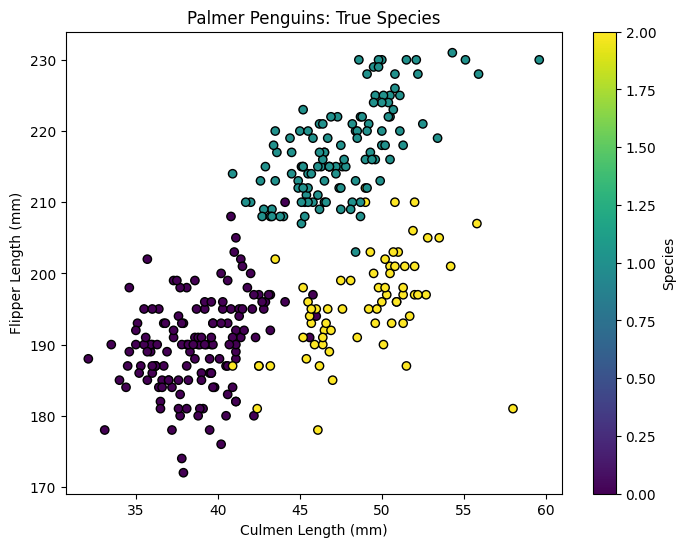

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

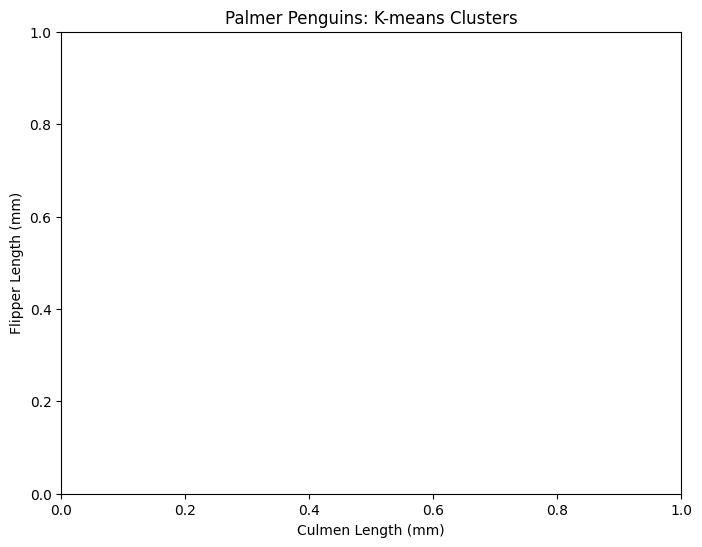

In [ ]:
# Read CSV and skip rows with missing numeric data
with open("palmer_penguins.csv", "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    data = [row for row in reader if "NA" not in row]

# Extract numeric columns and normalize
data = np.array(data)
# Select only the numeric columns (columns 2 to 5)
data_numeric = data[:, 2:6].astype(float)
data_mean = np.mean(data_numeric, axis=0)
data_std = np.std(data_numeric, axis=0)
data_normalized = (data_numeric - data_mean) / data_std

# Map species to integers
species_mapping = {"Adelie": 0, "Gentoo": 1, "Chinstrap": 2}
y_true = np.array([species_mapping[s] for s in data[:, 0]])

# Run your own K-means
k = 3
y_kmeans, centroids = kmeans(data_normalized, k=k, maxiter=300)

# Plot true species
plt.figure(figsize=(8, 6))
plt.scatter(
    data_numeric[:, 0], data_numeric[:, 2], c=y_true, cmap="viridis", edgecolor="k"
)
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.title("Palmer Penguins: True Species")
plt.show()

# Plot K-means clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    data_numeric[:, 0], data_numeric[:, 2], c=y_kmeans, cmap="viridis", edgecolor="k",
)
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.title("Palmer Penguins: K-means Clusters")
plt.show()